In [412]:
import pandas as pd
url='https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate'
#Suicides per 100,000 people in 2016 
df=pd.read_html(url, header=0)[3]
suicides = df.drop(["Both sexesrank"], axis=1)
suicides = (suicides.drop([0], axis=0)
                    .drop(["Males", "Females","Male:Femaleratio","Unnamed: 7","Unnamed: 8"], axis=1))
suicides["Country"] = suicides["Country"].replace(regex=True, to_replace=[r'\d', r' \(([^)]+)\)',r'\[a]'], value=r'')
suicides["Suicide rate"] = (suicides["Both sexes"].astype(float))
suicides = (suicides.drop(["Both sexes"], axis=1)
                    .drop(["Continent"], axis=1)
                   )
suicides.set_index('Country', inplace = True)
suicides.head()

In [420]:
suicides = df.drop(["Both sexesrank"], axis=1)
suicides = (suicides.drop([0], axis=0)
                    .drop(["Males", "Females","Male:Femaleratio","Unnamed: 7","Unnamed: 8"], axis=1))
suicides["Country"] = suicides["Country"].replace(regex=True, to_replace=[r'\d', r' \(([^)]+)\)',r'\[a]'], value=r'')
suicides["Suicide rate"] = (suicides["Both sexes"].astype(float))
suicides = (suicides.drop(["Both sexes"], axis=1)
                    .drop(["Continent"], axis=1)
                   )
suicides.set_index('Country', inplace = True)
suicides.head()

,Suicide rate
Country,
Guyana,30.2
Lesotho,28.9
Russia,26.5
Lithuania,25.7
Suriname,23.2


downlaod the sunshine data


In [424]:
import pandas as pd
url='https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration'
#Suicides per 100,000 people in 2016 
sunshine=pd.read_html(url, header=0)[2]
sunshine1 = pd.read_html(url, header=0)[3]
sunshine2 = pd.read_html(url, header=0)[4]
sunshine3 = pd.read_html(url, header=0)[5]
sunshine4 = pd.read_html(url, header=0)[6]
sunshine5 = pd.read_html(url, header=0)[7]
frames = [sunshine, sunshine1,sunshine2,sunshine3,sunshine4,sunshine5]

result = pd.concat(frames)
result = result.drop(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Ref.','City'], axis=1)
result = result.groupby(['Country'])['Year'].mean()

suicides["sunny"] = result/24
suicides['Suicide rate'] = suicides['Suicide rate'].astype(float)
suicides.head()

,Suicide rate,sunny
Country,,
Russia,26.5,82.199479
Lithuania,25.7,70.458333
Ivory Coast,23.0,96.721667
Kazakhstan,22.8,101.312500
Equatorial Guinea,22.0,64.539583


In [425]:
suicides = suicides.dropna()

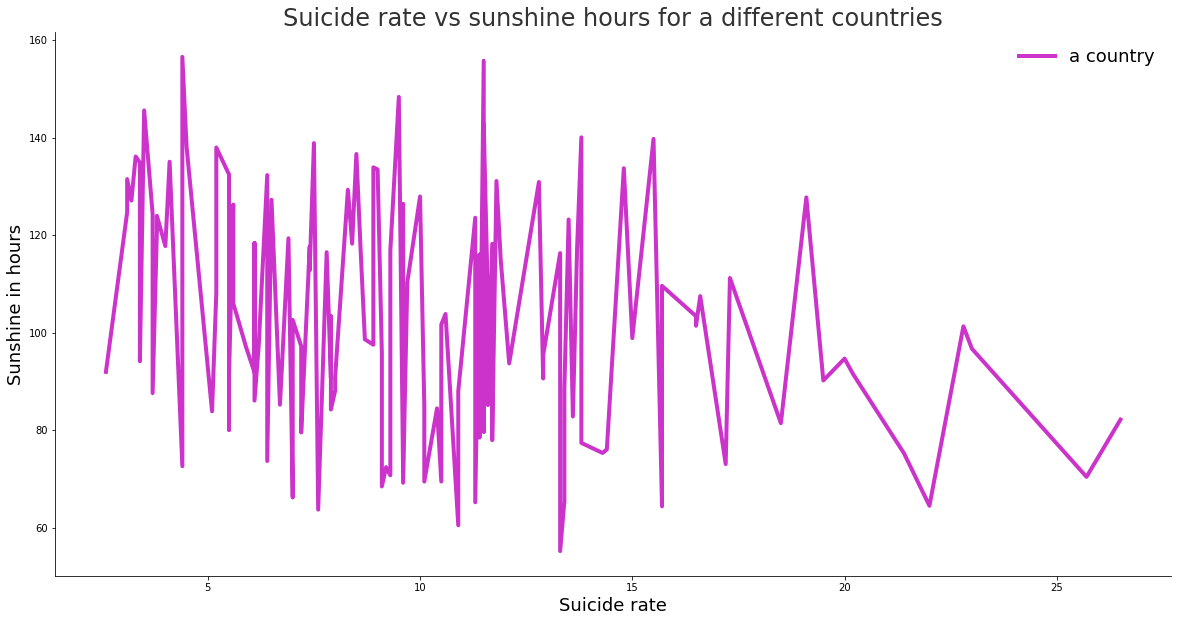

In [426]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title('Suicide rate vs sunshine hours for a different countries', fontsize=24, alpha=0.8)
plt.plot(suicides['Suicide rate'],suicides['sunny'],'-',color = 'm',alpha=0.8,linewidth=4.0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Sunshine in days', fontsize=18)
plt.xlabel('Suicide rate', fontsize=18)
plt.legend(['a country'],frameon=False,fontsize=18)
plt.show()

In [392]:
buf1 = suicides.sort_values('sunny',ascending=False)

buf1.head(5)

,Suicide rate,sunny
Country,,
Egypt,4.4,3756.42
Namibia,11.5,3737.5
Sudan,9.5,3559.55
Oman,3.5,3493.3
Botswana,11.5,3426.67


In [395]:
buf2 = suicides.sort_values('Suicide rate',ascending=False)

buf2.head(5)

,Suicide rate,sunny
Country,,
Russia,26.5,1972.79
Lithuania,25.7,1691
Ivory Coast,23.0,2321.32
Kazakhstan,22.8,2431.5
Equatorial Guinea,22.0,1548.95


In [396]:
buf2 = buf2.iloc[0:5]

In [226]:
buf1 = buf1.iloc[0:5]

In [228]:
frames2 = [buf1, buf2]

buf3 = pd.concat(frames2)
buf3["sunny"] = buf3["sunny"]
buf3

,Suicide rate,sunny
Country,,
Egypt,4.4,156.517
Namibia,11.5,155.729
Sudan,9.5,148.315
Oman,3.5,145.554
Botswana,11.5,142.778
Russia,26.5,82.1995
Lithuania,25.7,70.4583
Ivory Coast,23.0,96.7217
Kazakhstan,22.8,101.312


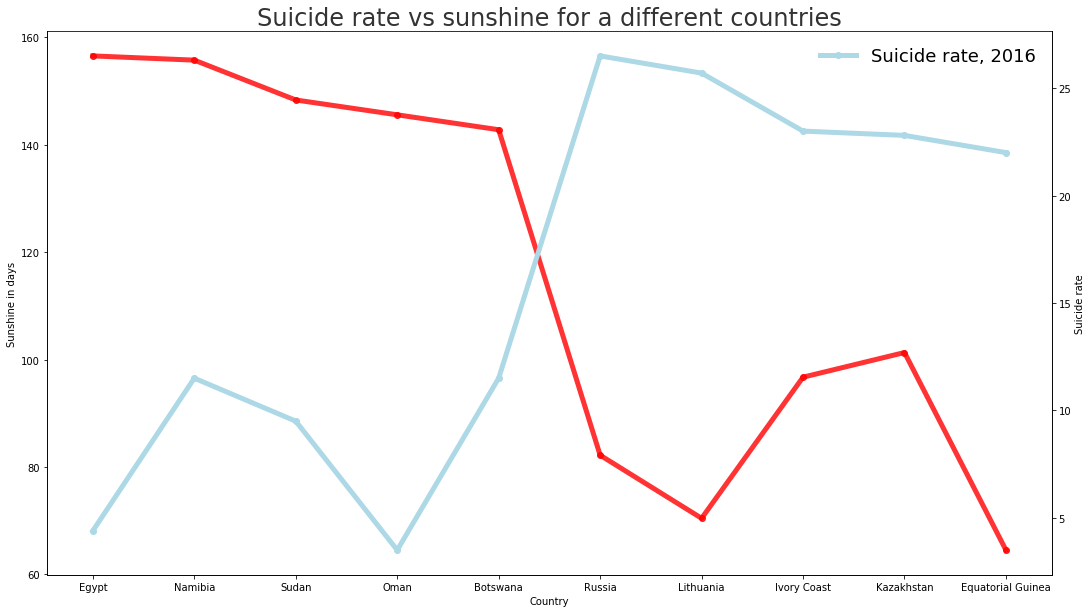

In [356]:
plt.figure(figsize=(18,10))
plt.style.use('seaborn-colorblind')
plt.title('Suicide rate vs sunshine for a different countries', fontsize=24, alpha=0.8)
#plt.plot(buf3['Suicide rate'],'-',color = 'm',marker='o',alpha=0.8)
ax3=plt.plot(buf3['sunny'],'-',color = 'r',marker='o',alpha=0.8,linewidth=5.0)
plt.ylabel('Sunshine in days')

ax = buf3['Suicide rate'].plot(secondary_y=True, color='lightblue', marker='o',linewidth=5.0)
ax.set_ylabel('Suicide rate')
plt.gca().spines['top'].set_visible(False)

plt.legend(['Suicide rate, 2016','Sunshine in days'],frameon=False,fontsize=18)
plt.show()